#  Prueba 3: Análisis CASO: CENSO EE. UU. 1994

## Importaremos las librerias y los dataset

# Librerias

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Importamos los datasets

In [206]:
ruta="D:/DataSet/"
df_train = pd.read_csv(ruta+"Sueldo_Train.csv")
df_test=pd.read_csv(ruta+"Sueldo_Test.csv")

###  Verificamos que se cargaron correctamente los datos

In [6]:
df_train.head()

,Id,edad,clase de trabajo,fnlwgt,educación,educación-num,estado civil,Ocupación,relación,raza,Sexo,ganancia de capital,pérdida de capital,horas por semana,país de origen,Sueldo
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_test.head()

,Id,edad,clase de trabajo,fnlwgt,educación,educación-num,estado civil,Ocupación,relación,raza,Sexo,ganancia de capital,pérdida de capital,horas por semana,país de origen
0,32562,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,32563,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,32564,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,32565,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,32566,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


#  Analizaremos los datos EDA

### Revisaremos las dimensiones de los datos

In [9]:
df_train.shape

(32561, 16)

* Los datos de entrenamiento son 32561 en 16 columnas

In [10]:
df_test.shape

(16281, 15)

* Los datos de test son 16281 en 15 columnas

## Revisaremos los tipos de datos 

In [11]:
df_train.dtypes

Id                      int64
edad                    int64
clase de trabajo       object
fnlwgt                  int64
educación              object
educación-num           int64
estado civil           object
Ocupación              object
relación               object
raza                   object
Sexo                   object
ganancia de capital     int64
pérdida de capital      int64
horas por semana        int64
país de origen         object
Sueldo                 object
dtype: object

In [12]:
df_test.dtypes

Id                      int64
edad                    int64
clase de trabajo       object
fnlwgt                  int64
educación              object
educación-num           int64
estado civil           object
Ocupación              object
relación               object
raza                   object
Sexo                   object
ganancia de capital     int64
pérdida de capital      int64
horas por semana        int64
país de origen         object
dtype: object

### Revisaremos los datos nulos

In [13]:
df_train.isnull().sum()

Id                      0
edad                    0
clase de trabajo        0
fnlwgt                  0
educación               0
educación-num           0
estado civil            0
Ocupación               0
relación                0
raza                    0
Sexo                   21
ganancia de capital     0
pérdida de capital      0
horas por semana        0
país de origen          0
Sueldo                  0
dtype: int64

### Como visualizamos el sexo contiene datos nulos

In [14]:
df_test.isnull().sum()

Id                     0
edad                   0
clase de trabajo       0
fnlwgt                 0
educación              0
educación-num          0
estado civil           0
Ocupación              0
relación               0
raza                   0
Sexo                   0
ganancia de capital    0
pérdida de capital     0
horas por semana       0
país de origen         0
dtype: int64

## Revisaremos los datos estadisticos generales

In [15]:
df_train.describe()

,Id,edad,fnlwgt,educación-num,ganancia de capital,pérdida de capital,horas por semana
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16281.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24421.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df_test.describe()

,Id,edad,fnlwgt,educación-num,ganancia de capital,pérdida de capital,horas por semana
count,16281.000000,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,40702.000000,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,4700.064202,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,32562.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,36632.000000,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,40702.000000,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,44772.000000,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,48842.000000,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


## Visualizaremos como arreglo las columnas

In [17]:
df_train.columns.values

array(['Id', 'edad', 'clase de trabajo', 'fnlwgt', 'educación',
       'educación-num', 'estado civil', 'Ocupación', 'relación', 'raza',
       'Sexo', 'ganancia de capital', 'pérdida de capital',
       'horas por semana', 'país de origen', 'Sueldo'], dtype=object)

In [18]:
df_test.columns.values

array(['Id', 'edad', 'clase de trabajo', 'fnlwgt', 'educación',
       'educación-num', 'estado civil', 'Ocupación', 'relación', 'raza',
       'Sexo', 'ganancia de capital', 'pérdida de capital',
       'horas por semana', 'país de origen'], dtype=object)

# La variable objetivo a Categorizar es Sueldo 

###  Visualizaremos la variable objetivo

In [21]:
#Comprobación de desequilibrio de clase Suledo
df_train['Sueldo'].value_counts()

 <=50K    24720
 >50K      7841
Name: Sueldo, dtype: int64

## Vemos que en este análisis las personas en una amplia mayoria ganan menor o igual a 50k

### Si visualizamos esto en un gráfico 
* Vemos que un 75,9% de las personas ganan menos o igual a 50k mientras que el 24.1% de la muestra ganan mas de 50k

Text(0.5, 1.0, 'Gráfico circular de sobrevivientes')

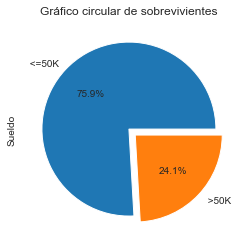

In [58]:
df_train['Sueldo'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.title("Gráfico circular de sobrevivientes")

# Visualizaciones de la informacion en gráficos


## Primero visualizaremos características categóricas.

Text(0.5, 1.0, 'Cantidad de personas por sueldo y clase de trabajo')

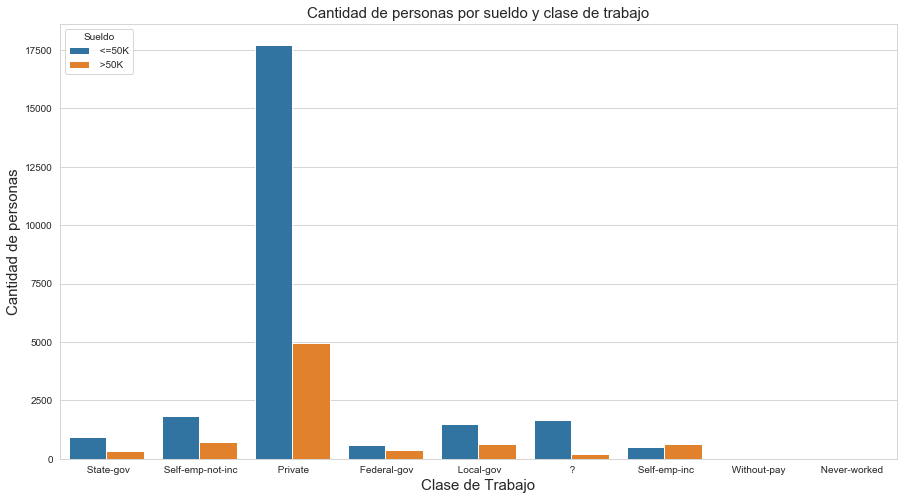

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(df_train['clase de trabajo'], hue=df_train['Sueldo'])
plt.xlabel("Clase de Trabajo",fontsize=15)
plt.ylabel("Cantidad de personas",fontsize=15)
plt.title("Cantidad de personas por sueldo y clase de trabajo",fontsize=15)

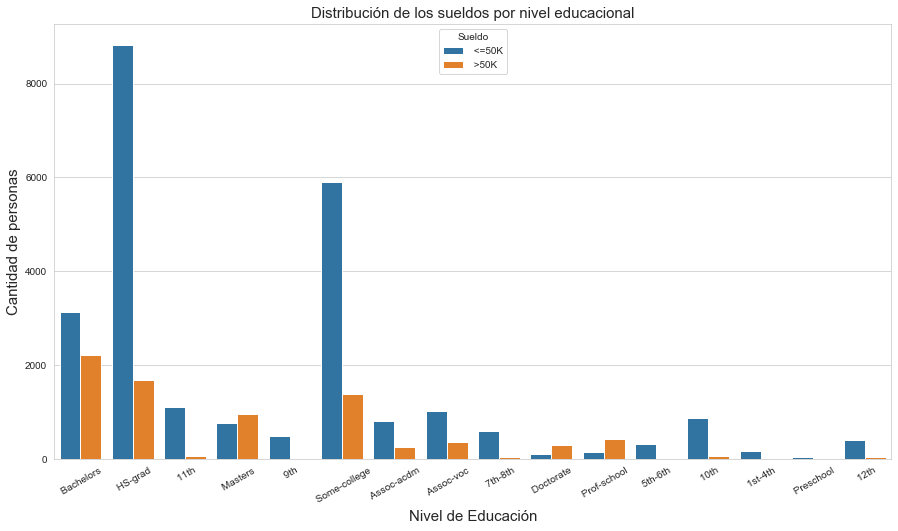

In [59]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df_train['educación'], hue=df_train['Sueldo']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.xlabel("Nivel de Educación",fontsize=15)
plt.ylabel("Cantidad de personas",fontsize=15)
plt.title("Distribución de los sueldos por nivel educacional",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Distribución de los sueldos por estado civil')

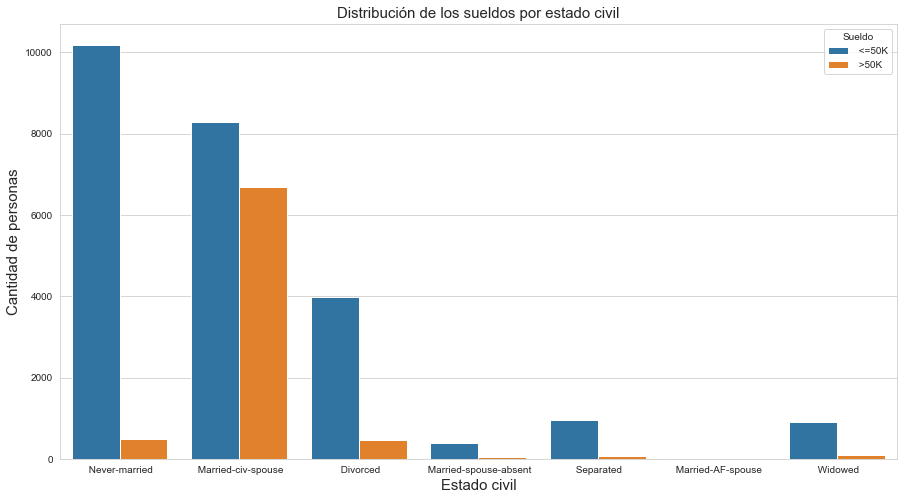

In [62]:
plt.figure(figsize=(15,8))
sns.countplot(df_train['estado civil'], hue=df_train['Sueldo'])
plt.xlabel("Estado civil",fontsize=15)
plt.ylabel("Cantidad de personas",fontsize=15)
plt.title("Distribución de los sueldos por estado civil",fontsize=15)

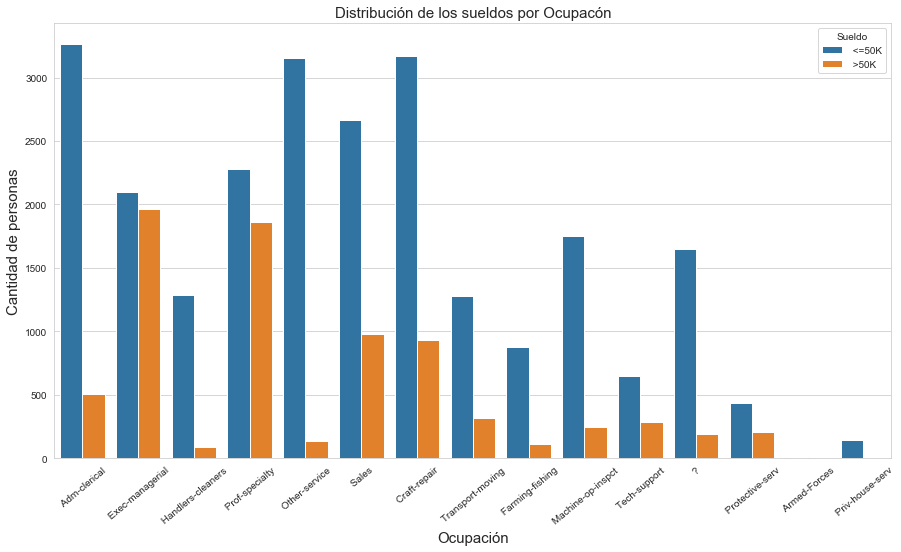

In [64]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df_train['Ocupación'], hue=df_train['Sueldo']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.xlabel("Ocupación",fontsize=15)
plt.ylabel("Cantidad de personas",fontsize=15)
plt.title("Distribución de los sueldos por Ocupacón",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Distribución de los sueldos por Relación')

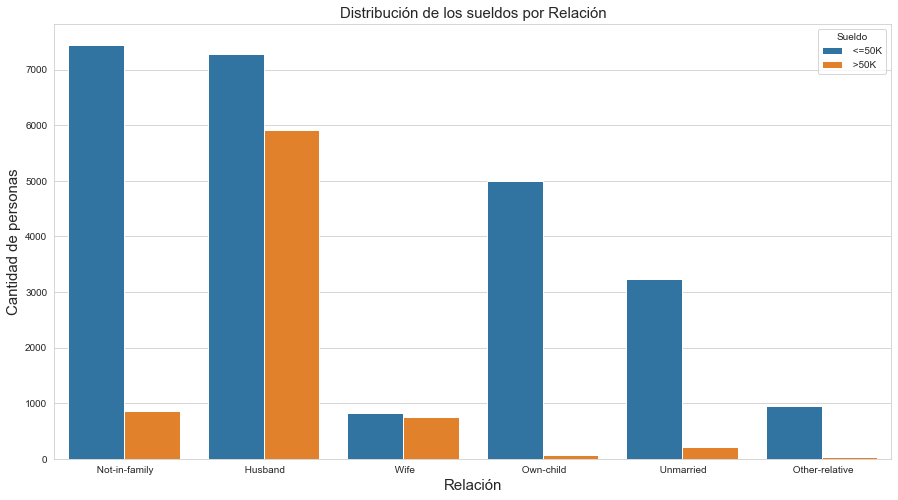

In [65]:
plt.figure(figsize=(15,8))
sns.countplot(df_train['relación'], hue=df_train['Sueldo'])
plt.xlabel("Relación",fontsize=15)
plt.ylabel("Cantidad de personas",fontsize=15)
plt.title("Distribución de los sueldos por Relación",fontsize=15)

Text(0.5, 1.0, 'Distribución de los sueldos por Raza')

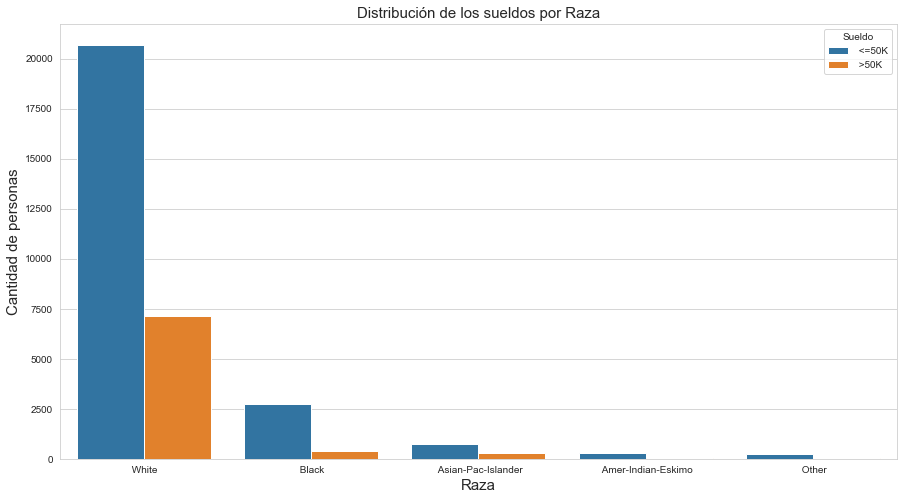

In [66]:
plt.figure(figsize=(15,8))
sns.countplot(df_train['raza'], hue=df_train['Sueldo'])
plt.xlabel("Raza",fontsize=15)
plt.ylabel("Cantidad de personas",fontsize=15)
plt.title("Distribución de los sueldos por Raza",fontsize=15)

Text(0.5, 1.0, 'Distribución de los sueldos por sexo')

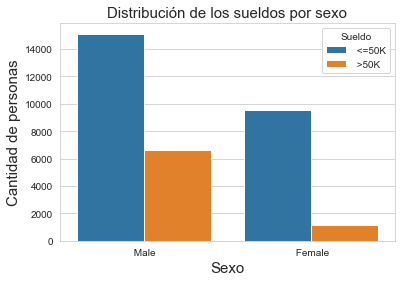

In [68]:
sns.countplot(df_train['Sexo'], hue=df_train['Sueldo'])
plt.xlabel("Sexo",fontsize=15)
plt.ylabel("Cantidad de personas",fontsize=15)
plt.title("Distribución de los sueldos por sexo",fontsize=15)

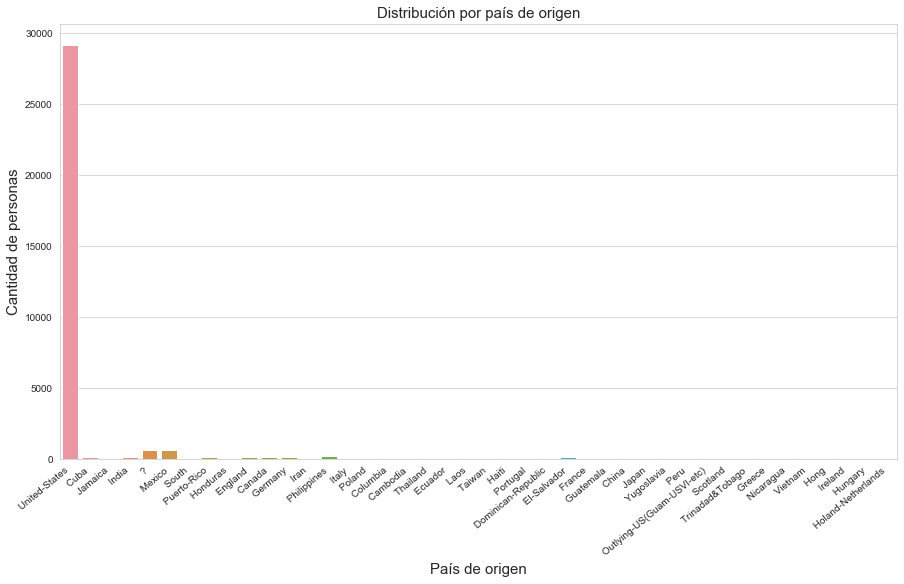

In [70]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df_train['país de origen']);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("País de origen",fontsize=15)
plt.ylabel("Cantidad de personas",fontsize=15)
plt.title("Distribución por país de origen",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Distribución de los datos de edad')

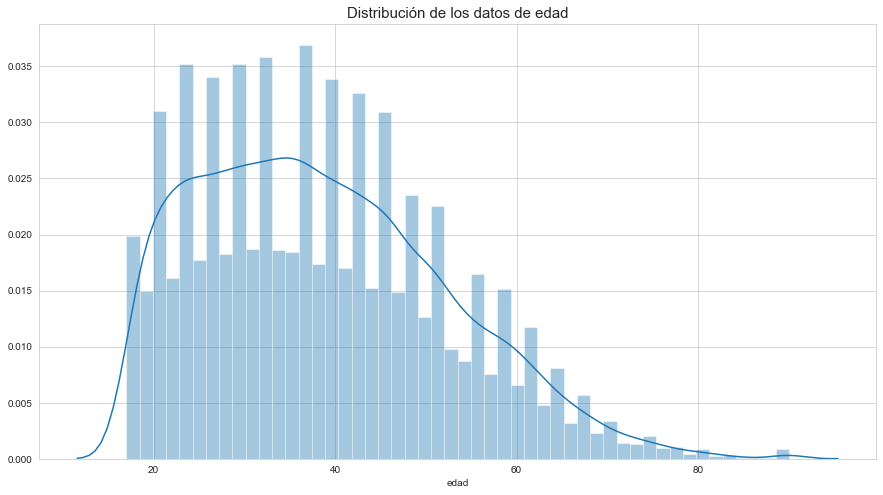

In [77]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['edad'])
plt.title("Distribución de los datos de edad",fontsize=15)

Text(0.5, 1.0, 'Distribución de los datos de fnlwgt')

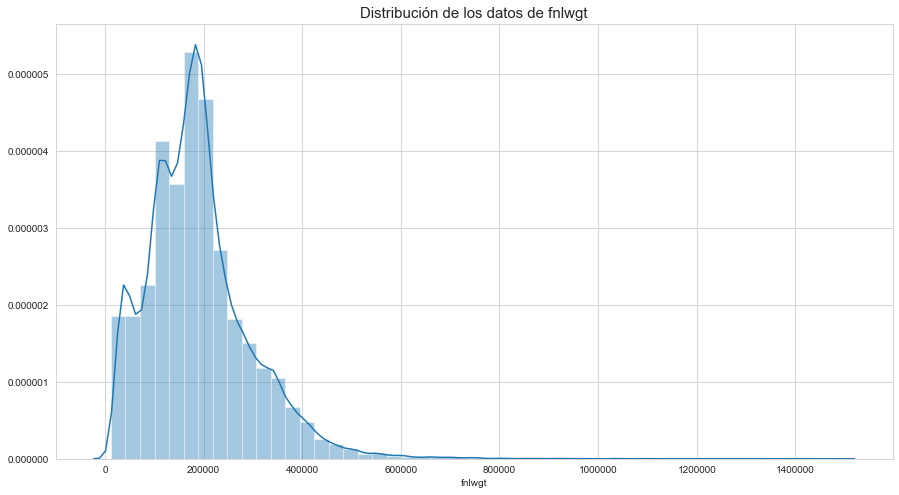

In [79]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['fnlwgt'])
plt.title("Distribución de los datos de fnlwgt",fontsize=15)

Text(0.5, 1.0, 'Distribución de los datos educación-num')

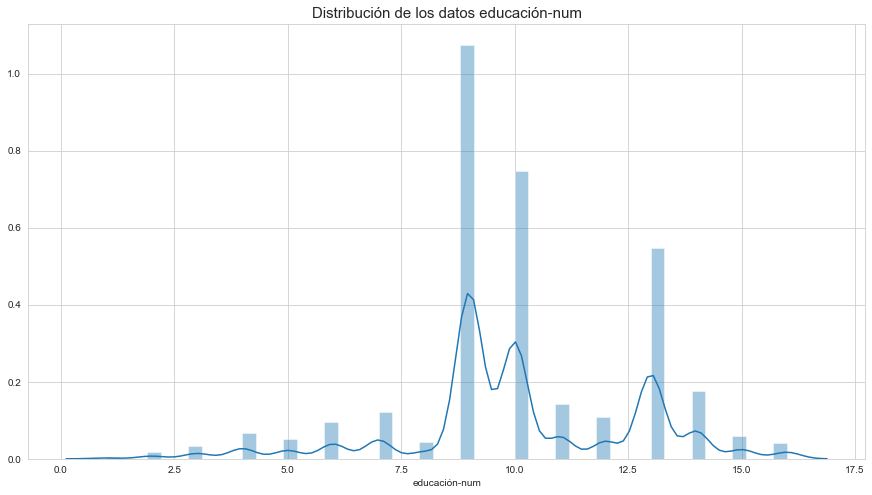

In [81]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['educación-num'])
plt.title("Distribución de los datos educación-num",fontsize=15)

Text(0.5, 1.0, 'Distribución de los datos de horas por semana')

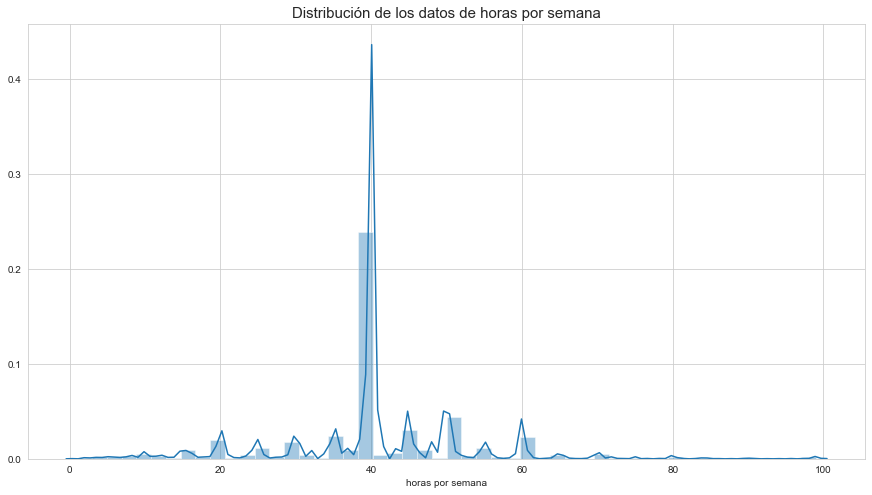

In [82]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['horas por semana'])
plt.title("Distribución de los datos de horas por semana",fontsize=15)

# Matriz de correlación

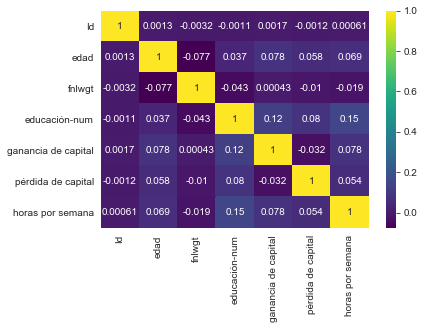

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='viridis');

### Mediante la visualización de la información podemos notar que tenemos valores faltantes que estan con el simbolo de "?", otra punto importante es que los datos de pais de origen en su amplia mayoria son de EEUU

# Limpieza de los Datos

#### La limpieza de los datos es el paso mas importante para posteriormente ejecutar nuestos modelos

### La variable objetivo

* Sueldo tenemos Solamente dos y es de tipo object para tratar esta variable utilizaremos el metodo de label encoder de SKlearn

In [170]:
df_train["Sueldo"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [171]:
le = LabelEncoder()
df_train["Sueldo"]=le.fit_transform(df_train["Sueldo"])

##### Vemos que ahora se convirtio en un tipo de variable int32 y es un arreglo de 0,1

In [172]:
df_train["Sueldo"].dtype

dtype('int32')

In [173]:
df_train["Sueldo"]

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Sueldo, Length: 32561, dtype: int32

### Trataremos la variable de Estado civil

In [174]:
df_train["estado civil"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

### Mediante el gráfico nos dimos cuenta que varias expresan practicamente lo mismo como separado y divorciado, para hacer Este tipo de cambios podemos usar Replace o numpy para esta prueba utilizaremos numpy
adjuntamos la documentación de numpy https://numpy.org/doc/stable/reference/generated/numpy.where.html

* Divorciado y Separado lo dejaremos como divorciado

In [175]:
df_train["estado civil"] = np.where(df_train["estado civil"]==" Divorced", "Divorciado", df_train["estado civil"])
df_train["estado civil"] = np.where(df_train["estado civil"]==" Separated", "Divorciado", df_train["estado civil"])

Los distintos tipos de Casado seran Casado

In [176]:
df_train["estado civil"] = np.where(df_train["estado civil"]==" Married-civ-spouse", "Casado", df_train["estado civil"])
df_train["estado civil"] = np.where(df_train["estado civil"]==" Married-spouse-absent", "Casado", df_train["estado civil"])
df_train["estado civil"] = np.where(df_train["estado civil"]==" Married-AF-spouse", "Casado", df_train["estado civil"])

In [177]:
df_train["estado civil"].unique() # vemos que tenemos un arreglo mas limpio

array([' Never-married', 'Casado', 'Divorciado', ' Widowed'], dtype=object)

### Repetimos el proceso para los datos de Test

In [178]:
df_test["estado civil"] = np.where(df_test["estado civil"]==" Divorced", "Divorciado", df_test["estado civil"])
df_test["estado civil"] = np.where(df_test["estado civil"]==" Separated", "Divorciado", df_test["estado civil"])
df_test["estado civil"] = np.where(df_test["estado civil"]==" Married-civ-spouse", "Casado", df_test["estado civil"])
df_test["estado civil"] = np.where(df_test["estado civil"]==" Married-spouse-absent", "Casado", df_test["estado civil"])
df_test["estado civil"] = np.where(df_test["estado civil"]==" Married-AF-spouse", "Casado", df_test["estado civil"])

In [179]:
df_test["estado civil"].unique() # vemos que tenemos un arreglo mas limpio

array([' Never-married', 'Casado', ' Widowed', 'Divorciado'], dtype=object)

## Clase de trabajo limpiaremos los "?" lo dejaremos como valor desconocido

In [180]:
df_train["clase de trabajo"]=np.where(df_train["clase de trabajo"]==" ?","Desconocido",df_train["clase de trabajo"])
df_test["clase de trabajo"]=np.where(df_test["clase de trabajo"]==" ?","Desconocido",df_test["clase de trabajo"])

## En ocupación repetiremos el proceso

In [181]:
df_train["Ocupación"] = np.where(df_train["Ocupación"]==" ?", "Desconocido", df_train["Ocupación"])
df_test["Ocupación"] = np.where(df_test["Ocupación"]==" ?", "Desconocido", df_test["Ocupación"])

## Limpiaremos los datos de educación

### Como vemos tenemos mucha segmentacion seria como aca en chile decir 2do, 3ero ,4 medio, y si lo expresamos de otra forma seria educacion media, haremos eso con los datos, mediante informacion oficial del sistema educativo de EEUU

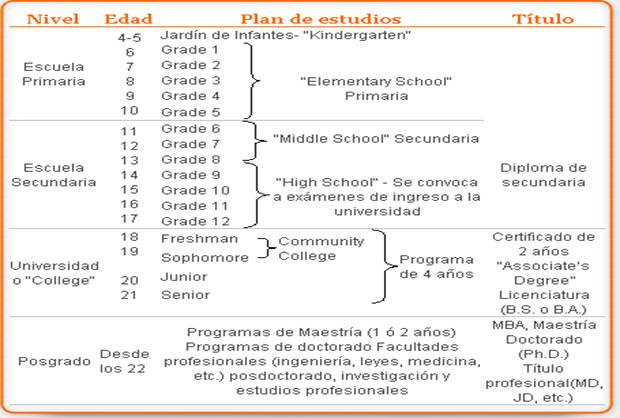

In [101]:
Image(filename="D:/DataSet/educacion.jpg")

In [182]:
df_train["educación"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

# Utilizaremos numpy para filtrar y cambiar los valores

In [183]:
df_train["educación"] = np.where(df_train["educación"]==" Preschool", "Primaria", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" 1st-4th", "Primaria", df_train["educación"])

df_train["educación"] = np.where(df_train["educación"]==" 5th-6th", "Secundaria", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" 7th-8th", "Secundaria", df_train["educación"])

df_train["educación"] = np.where(df_train["educación"]==" 9th", "High School", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" 10th", "High School", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" 11th", "High School", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" 12th", "High School", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" HS-grad", "High School", df_train["educación"])

df_train["educación"] = np.where(df_train["educación"]==" Some-college","Universidad", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" Assoc-acdm", "Universidad", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" Assoc-voc", "Universidad", df_train["educación"])

df_train["educación"] = np.where(df_train["educación"]==" Bachelors", "Posgrado", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" Masters", "Posgrado", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" Prof-school", "Posgrado", df_train["educación"])
df_train["educación"] = np.where(df_train["educación"]==" Doctorate", "Posgrado", df_train["educación"])

In [184]:
df_train["educación"].unique() # vemos un arreglo mas limpio

array(['Posgrado', 'High School', 'Universidad', 'Secundaria', 'Primaria'],
      dtype=object)

### Repetimos el proceso en los datos de test

In [185]:
df_test["educación"] = np.where(df_test["educación"]==" Preschool", "Primaria", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" 1st-4th", "Primaria", df_test["educación"])

df_test["educación"] = np.where(df_test["educación"]==" 5th-6th", "Secundaria", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" 7th-8th", "Secundaria", df_test["educación"])

df_test["educación"] = np.where(df_test["educación"]==" 9th", "High School", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" 10th", "High School", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" 11th", "High School", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" 12th", "High School", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" HS-grad", "High School", df_test["educación"])

df_test["educación"] = np.where(df_test["educación"]==" Some-college","Universidad", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" Assoc-acdm", "Universidad", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" Assoc-voc", "Universidad", df_test["educación"])

df_test["educación"] = np.where(df_test["educación"]==" Bachelors", "Posgrado", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" Masters", "Posgrado", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" Prof-school", "Posgrado", df_test["educación"])
df_test["educación"] = np.where(df_test["educación"]==" Doctorate", "Posgrado", df_test["educación"])

In [186]:
df_test["educación"].unique() # vemos un arreglo mas limpio

array(['High School', 'Universidad', 'Posgrado', 'Secundaria', 'Primaria'],
      dtype=object)

## Variable sexo solo tenemos un valor nulo asi que decidimos borrarlo ya que remplazarlo por valor desconocido no sera influyente en este análisis

In [147]:
df_train["Sexo"].unique()

array([' Male', ' Female', nan], dtype=object)

In [187]:
df_train["Sexo"].fillna("Desconocido",inplace =True)

In [188]:
df_train["Sexo"]

0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
32556     Female
32557       Male
32558     Female
32559       Male
32560     Female
Name: Sexo, Length: 32561, dtype: object

## Crearemos las varibles dummy de sexo y eliminaremos la redundante

In [189]:
dummy_sexo = pd.get_dummies(df_train["Sexo"],prefix="Sexo").iloc[:,1:]

In [190]:
dummy_sexo

,Sexo_ Male,Sexo_Desconocido
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
32556,0,0
32557,1,0
32558,0,0
32559,1,0


In [191]:
df_train=pd.concat([df_train,dummy_sexo],axis=1)

In [192]:
dummy_sexot = pd.get_dummies(df_test["Sexo"],prefix="Sexo").iloc[:,1:]

In [193]:
df_test=pd.concat([df_test,dummy_sexot],axis=1)

In [194]:
df_train.drop(['Sexo'], axis = 1, inplace = True)
df_test.drop(['Sexo'], axis = 1, inplace = True)

# Borrado de columnas que no utilizaremos para los modelos 

In [195]:
df_train.drop(['Id','fnlwgt', 'ganancia de capital', 'pérdida de capital', 'país de origen', 'educación-num'], axis=1, inplace=True)

In [196]:
df_train.head()

,edad,clase de trabajo,educación,estado civil,Ocupación,relación,raza,horas por semana,Sueldo,Sexo_ Male,Sexo_Desconocido
0,39,State-gov,Posgrado,Never-married,Adm-clerical,Not-in-family,White,40,0,1,0
1,50,Self-emp-not-inc,Posgrado,Casado,Exec-managerial,Husband,White,13,0,1,0
2,38,Private,High School,Divorciado,Handlers-cleaners,Not-in-family,White,40,0,1,0
3,53,Private,High School,Casado,Handlers-cleaners,Husband,Black,40,0,1,0
4,28,Private,Posgrado,Casado,Prof-specialty,Wife,Black,40,0,0,0


In [197]:
df_test.drop(['Id','fnlwgt', 'ganancia de capital', 'pérdida de capital', 'país de origen', 'educación-num'], axis=1, inplace=True)

In [159]:
df_test.head()

,edad,clase de trabajo,educación,estado civil,Ocupación,relación,raza,horas por semana,Sexo_ Male
0,25,Private,High School,Never-married,Machine-op-inspct,Own-child,Black,40,1
1,38,Private,High School,Casado,Farming-fishing,Husband,White,50,1
2,28,Local-gov,Universidad,Casado,Protective-serv,Husband,White,40,1
3,44,Private,Universidad,Casado,Machine-op-inspct,Husband,Black,40,1
4,18,Desconocido,Universidad,Never-married,Desconocido,Own-child,White,30,0


In [198]:
df_train["clase de trabajo"]=le.fit_transform(df_train["clase de trabajo"])
df_train["educación"]=le.fit_transform(df_train["educación"])
df_train["estado civil"]=le.fit_transform(df_train["estado civil"])
df_train["Ocupación"]=le.fit_transform(df_train["Ocupación"])
df_train["relación"]=le.fit_transform(df_train["relación"])
df_train["raza"]=le.fit_transform(df_train["raza"])

In [199]:
df_test["clase de trabajo"]=le.fit_transform(df_test["clase de trabajo"])
df_test["educación"]=le.fit_transform(df_test["educación"])
df_test["estado civil"]=le.fit_transform(df_test["estado civil"])
df_test["Ocupación"]=le.fit_transform(df_test["Ocupación"])
df_test["relación"]=le.fit_transform(df_test["relación"])
df_test["raza"]=le.fit_transform(df_test["raza"])

In [200]:
df_test.head()

,edad,clase de trabajo,educación,estado civil,Ocupación,relación,raza,horas por semana,Sexo_ Male
0,25,3,0,0,6,3,2,40,1
1,38,3,0,2,4,0,4,50,1
2,28,1,4,2,10,0,4,40,1
3,44,3,4,2,6,0,2,40,1
4,18,8,4,0,14,3,4,30,0


In [201]:
df_train.head()

,edad,clase de trabajo,educación,estado civil,Ocupación,relación,raza,horas por semana,Sueldo,Sexo_ Male,Sexo_Desconocido
0,39,6,1,0,0,1,4,40,0,1,0
1,50,5,1,2,3,0,4,13,0,1,0
2,38,3,0,3,5,1,4,40,0,1,0
3,53,3,0,2,5,0,2,40,0,1,0
4,28,3,1,2,9,5,2,40,0,0,0


In [202]:
df_train.dtypes

edad                int64
clase de trabajo    int32
educación           int32
estado civil        int32
Ocupación           int32
relación            int32
raza                int32
horas por semana    int64
Sueldo              int32
Sexo_ Male          uint8
Sexo_Desconocido    uint8
dtype: object

In [203]:
df_test.dtypes

edad                int64
clase de trabajo    int32
educación           int32
estado civil        int32
Ocupación           int32
relación            int32
raza                int32
horas por semana    int64
Sexo_ Male          uint8
dtype: object

# Rutina de limpieza

In [204]:
def Rutina_limpieza(datos):
    le = LabelEncoder()
    datos["Sueldo"]=le.fit_transform(datos["Sueldo"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Divorced", "Divorciado", datos["estado civil"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Separated", "Divorciado", datos["estado civil"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Married-civ-spouse", "Casado", datos["estado civil"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Married-spouse-absent", "Casado", datos["estado civil"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Married-AF-spouse", "Casado", datos["estado civil"])
    
    datos["clase de trabajo"]=np.where(datos["clase de trabajo"]==" ?","Desconocido",datos["clase de trabajo"])
    datos["Ocupación"] = np.where(datos["Ocupación"]==" ?", "Desconocido", datos["Ocupación"])
    
    datos["educación"] = np.where(datos["educación"]==" Preschool", "Primaria", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 1st-4th", "Primaria", datos["educación"])

    datos["educación"] = np.where(datos["educación"]==" 5th-6th", "Secundaria", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 7th-8th", "Secundaria", datos["educación"])

    datos["educación"] = np.where(datos["educación"]==" 9th", "High School", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 10th", "High School", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 11th", "High School", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 12th", "High School", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" HS-grad", "High School", datos["educación"])

    datos["educación"] = np.where(datos["educación"]==" Some-college","Universidad", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Assoc-acdm", "Universidad", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Assoc-voc", "Universidad", datos["educación"])

    datos["educación"] = np.where(datos["educación"]==" Bachelors", "Posgrado", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Masters", "Posgrado", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Prof-school", "Posgrado", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Doctorate", "Posgrado", datos["educación"])
    
    datos["Sexo"].fillna("Desconocido",inplace =True)
    dummy_sexo = pd.get_dummies(datos["Sexo"],prefix="Sexo").iloc[:,1:]
    datos=pd.concat([datos,dummy_sexo],axis=1)
    datos.drop(['Sexo'], axis = 1, inplace = True)
    datos.drop(['Id','fnlwgt', 'ganancia de capital', 'pérdida de capital', 'país de origen', 'educación-num'], axis=1, inplace=True)
    
    datos["clase de trabajo"]=le.fit_transform(datos["clase de trabajo"])
    datos["educación"]=le.fit_transform(datos["educación"])
    datos["estado civil"]=le.fit_transform(datos["estado civil"])
    datos["Ocupación"]=le.fit_transform(datos["Ocupación"])
    datos["relación"]=le.fit_transform(datos["relación"])
    datos["raza"]=le.fit_transform(datos["raza"])

    return datos      

In [205]:
def Rutina_limpiezatest(datos):
  
    datos["estado civil"] = np.where(datos["estado civil"]==" Divorced", "Divorciado", datos["estado civil"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Separated", "Divorciado", datos["estado civil"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Married-civ-spouse", "Casado", datos["estado civil"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Married-spouse-absent", "Casado", datos["estado civil"])
    datos["estado civil"] = np.where(datos["estado civil"]==" Married-AF-spouse", "Casado", datos["estado civil"])
    
    datos["clase de trabajo"]=np.where(datos["clase de trabajo"]==" ?","Desconocido",datos["clase de trabajo"])
    datos["Ocupación"] = np.where(datos["Ocupación"]==" ?", "Desconocido", datos["Ocupación"])
    
    datos["educación"] = np.where(datos["educación"]==" Preschool", "Primaria", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 1st-4th", "Primaria", datos["educación"])

    datos["educación"] = np.where(datos["educación"]==" 5th-6th", "Secundaria", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 7th-8th", "Secundaria", datos["educación"])

    datos["educación"] = np.where(datos["educación"]==" 9th", "High School", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 10th", "High School", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 11th", "High School", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" 12th", "High School", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" HS-grad", "High School", datos["educación"])

    datos["educación"] = np.where(datos["educación"]==" Some-college","Universidad", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Assoc-acdm", "Universidad", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Assoc-voc", "Universidad", datos["educación"])

    datos["educación"] = np.where(datos["educación"]==" Bachelors", "Posgrado", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Masters", "Posgrado", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Prof-school", "Posgrado", datos["educación"])
    datos["educación"] = np.where(datos["educación"]==" Doctorate", "Posgrado", datos["educación"])
    
    datos["Sexo"].fillna("Desconocido",inplace =True)
    dummy_sexo = pd.get_dummies(datos["Sexo"],prefix="Sexo").iloc[:,1:]
    datos=pd.concat([datos,dummy_sexo],axis=1)
    datos.drop(['Sexo'], axis = 1, inplace = True)
    datos.drop(['Id','fnlwgt', 'ganancia de capital', 'pérdida de capital', 'país de origen', 'educación-num'], axis=1, inplace=True)
    
    datos["clase de trabajo"]=le.fit_transform(datos["clase de trabajo"])
    datos["educación"]=le.fit_transform(datos["educación"])
    datos["estado civil"]=le.fit_transform(datos["estado civil"])
    datos["Ocupación"]=le.fit_transform(datos["Ocupación"])
    datos["relación"]=le.fit_transform(datos["relación"])
    datos["raza"]=le.fit_transform(datos["raza"])

    return datos

In [207]:
df_train=Rutina_limpieza(df_train)

In [208]:
df_train.head()

,edad,clase de trabajo,educación,estado civil,Ocupación,relación,raza,horas por semana,Sueldo,Sexo_ Male,Sexo_Desconocido
0,39,6,1,0,0,1,4,40,0,1,0
1,50,5,1,2,3,0,4,13,0,1,0
2,38,3,0,3,5,1,4,40,0,1,0
3,53,3,0,2,5,0,2,40,0,1,0
4,28,3,1,2,9,5,2,40,0,0,0


In [209]:
df_test=Rutina_limpiezatest(df_test)

In [210]:
df_test.head()

,edad,clase de trabajo,educación,estado civil,Ocupación,relación,raza,horas por semana,Sexo_ Male
0,25,3,0,0,6,3,2,40,1
1,38,3,0,2,4,0,4,50,1
2,28,1,4,2,10,0,4,40,1
3,44,3,4,2,6,0,2,40,1
4,18,8,4,0,14,3,4,30,0


# Aplicación de modelos

#### Seleccionamos las columnas para X,Y

In [213]:
columnas = ["edad","clase de trabajo","educación","estado civil", "Ocupación", "relación", "raza",
         "horas por semana","Sexo_ Male"]

In [214]:
X = df_train[columnas]
Y = df_train["Sueldo"]

# Dividimos en conjunto Train y Test con Sklearn

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Regresion logistica

In [217]:
reg_log = LogisticRegression()
reg_log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
print(f"Presisión de la prediccion %.2f"%(reg_log.score(X_train,Y_train)*100),"%")

Presisión de la prediccion 76.34 %


In [232]:
pred = reg_log.predict(X_test)

In [233]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      7407
           1       0.50      0.16      0.24      2362

    accuracy                           0.76      9769
   macro avg       0.64      0.55      0.55      9769
weighted avg       0.71      0.76      0.71      9769



# Random forest

In [222]:
rfc= RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
print(f"Presisión de la prediccion %.2f"%(rfc.score(X_train,Y_train)*100),"%")

Presisión de la prediccion 85.92 %


In [234]:
pred = rfc.predict(X_test)

In [235]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7407
           1       0.70      0.54      0.61      2362

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.83      9769



# Kneighbors

In [224]:
vecino = KNeighborsClassifier()
vecino.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [226]:
print(f"Presisión de la prediccion %.2f"%(vecino.score(X_train,Y_train)*100),"%")

Presisión de la prediccion 85.12 %


In [236]:
pred=vecino.predict(X_test)

In [237]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      7407
           1       0.54      0.50      0.52      2362

    accuracy                           0.78      9769
   macro avg       0.69      0.68      0.69      9769
weighted avg       0.77      0.78      0.77      9769



# Decision Tree

In [227]:
dtree = DecisionTreeClassifier(criterion="gini") 
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [228]:
print(f"Presisión de la prediccion %.2f"%(dtree.score(X_train,Y_train)*100),"%")

Presisión de la prediccion 95.99 %


In [238]:
pred=dtree.predict(X_test)

In [239]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      7407
           1       0.55      0.52      0.53      2362

    accuracy                           0.78      9769
   macro avg       0.70      0.69      0.69      9769
weighted avg       0.78      0.78      0.78      9769



# Normalizamos los datos

In [230]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Aplicamos los modelos con los datos normalizados

## Regresion Logistica norm

In [240]:
reg_log = LogisticRegression()
reg_log.fit(X_train_norm,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
print(f"Presisión de la prediccion %.2f"%(reg_log.score(X_train_norm,Y_train)*100),"%")

Presisión de la prediccion 76.36 %


In [242]:
pred = reg_log.predict(X_test)

In [243]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7407
           1       0.24      1.00      0.39      2362

    accuracy                           0.24      9769
   macro avg       0.12      0.50      0.19      9769
weighted avg       0.06      0.24      0.09      9769



## Random Forest normalizado

In [244]:
rfc= RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=100)
rfc.fit(X_train_norm,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [245]:
print(f"Presisión de la prediccion %.2f"%(rfc.score(X_train_norm,Y_train)*100),"%")

Presisión de la prediccion 85.79 %


In [246]:
pred = rfc.predict(X_test)

In [247]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7407
           1       0.44      0.00      0.01      2362

    accuracy                           0.76      9769
   macro avg       0.60      0.50      0.43      9769
weighted avg       0.68      0.76      0.66      9769



## kneigbors Normalizado

In [248]:
vecino = KNeighborsClassifier()
vecino.fit(X_train_norm, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [249]:
print(f"Presisión de la prediccion %.2f"%(vecino.score(X_train_norm,Y_train)*100),"%")

Presisión de la prediccion 86.80 %


In [250]:
pred = vecino.predict(X_test)

In [251]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      7407
           1       0.17      0.03      0.05      2362

    accuracy                           0.73      9769
   macro avg       0.46      0.49      0.45      9769
weighted avg       0.61      0.73      0.65      9769



## Decision Tree Normalizado

In [252]:
dtree = DecisionTreeClassifier(criterion="gini") 
dtree.fit(X_train_norm,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [253]:
print(f"Presisión de la prediccion %.2f"%(dtree.score(X_train_norm,Y_train)*100),"%")

Presisión de la prediccion 95.99 %


In [254]:
pred = dtree.predict(X_test)

In [255]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      7407
           1       0.50      0.02      0.05      2362

    accuracy                           0.76      9769
   macro avg       0.63      0.51      0.45      9769
weighted avg       0.70      0.76      0.66      9769



## Estandarizamos los datos

In [257]:
scale = StandardScaler().fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

## Ejecutamos modelos con datos estandarizados

## Regresion logistica estandarizada

In [258]:
reg_log = LogisticRegression()
reg_log.fit(X_train_stand,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [259]:
print(f"Presisión de la prediccion %.2f"%(reg_log.score(X_train_stand,Y_train)*100),"%")

Presisión de la prediccion 76.36 %


In [262]:
pred = reg_log.predict(X_test)

In [263]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7407
           1       0.24      1.00      0.39      2362

    accuracy                           0.24      9769
   macro avg       0.12      0.50      0.19      9769
weighted avg       0.06      0.24      0.09      9769



## Random Forest Estandarizado

In [264]:
rfc= RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=100)
rfc.fit(X_train_stand,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [265]:
print(f"Presisión de la prediccion %.2f"%(rfc.score(X_train_stand,Y_train)*100),"%")

Presisión de la prediccion 85.80 %


In [266]:
pred = rfc.predict(X_test)

In [267]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7407
           1       0.00      0.00      0.00      2362

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.57      0.76      0.65      9769



## kneigbors estandarizado

In [268]:
vecino = KNeighborsClassifier()
vecino.fit(X_train_stand, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [269]:
print(f"Presisión de la prediccion %.2f"%(vecino.score(X_train_stand,Y_train)*100),"%")

Presisión de la prediccion 86.47 %


In [270]:
pred = rfc.predict(X_test)

In [271]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7407
           1       0.00      0.00      0.00      2362

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.57      0.76      0.65      9769



## Decision Tree estandarizado

In [272]:
dtree = DecisionTreeClassifier(criterion="gini") 
dtree.fit(X_train_stand,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [273]:
print(f"Presisión de la prediccion %.2f"%(dtree.score(X_train_stand,Y_train)*100),"%")

Presisión de la prediccion 95.99 %


In [274]:
pred = dtree.predict(X_test)

In [275]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7407
           1       0.00      0.00      0.00      2362

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.57      0.76      0.65      9769



# Modelo a elegir

* bajo cada modelo ejecutado podemos ver las metricas podemos decidir que el modelo que mejor nos sirve para este conjunto de datos es Decision Tree con un 95.99%

In [277]:
dtree = DecisionTreeClassifier(criterion="gini") 
dtree.fit(X_train_norm,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [278]:
print(f"Presisión de la prediccion %.2f"%(dtree.score(X_train_norm,Y_train)*100),"%")

Presisión de la prediccion 95.99 %


# Aplicamos el modelo a los datos 

In [281]:
pred_tree= dtree.predict(df_test)

In [282]:
pred_tree

array([0, 0, 0, ..., 0, 0, 0])

In [283]:
pred_tree_df = pd.DataFrame(pred_tree)

In [284]:
pred_tree_df.head()

,0
0,0
1,0
2,0
3,0
4,0


# Convertimos las predicciones en un DataFrame para mejor visualización